In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('World_Happiness_Score.csv')
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
data=pd.DataFrame(data=data)

In [4]:
data.shape

(158, 12)

In [5]:
data.tail(3)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [6]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [7]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [8]:
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [9]:
# no null values are present

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [11]:
data['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [12]:
data['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

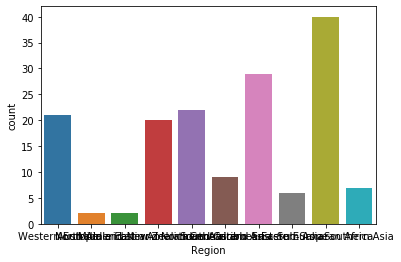

In [13]:
sns.countplot(data['Region'])

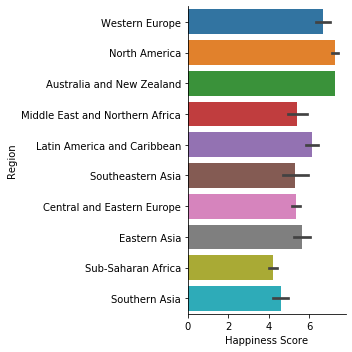

In [14]:
sns.catplot(x='Happiness Score',y='Region',data=data,kind='bar')

In [15]:
# North America,Australia and New Zealand have maxium Happiness Score

In [16]:
# Lowest Happiness score is in Sub-Saharan Africa Region.

In [17]:
data.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


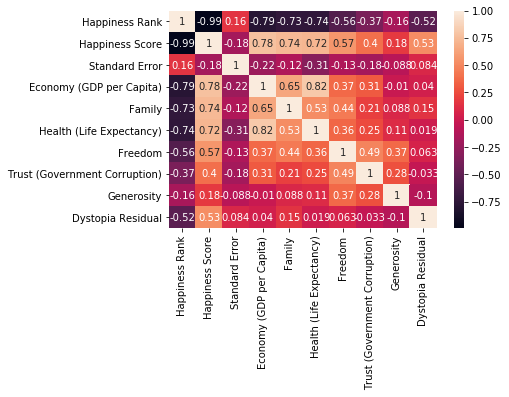

In [18]:
sns.heatmap(data.corr(),annot=True)

In [19]:
# Happiness Score is highly positive correlated with Economy(GDP per capita) after that Family,Health and freedom.

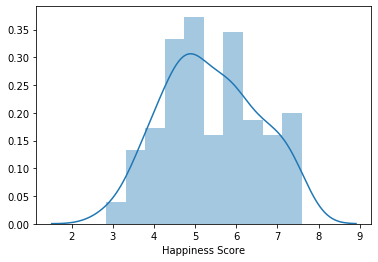

In [20]:
sns.distplot(data['Happiness Score'],bins=10)

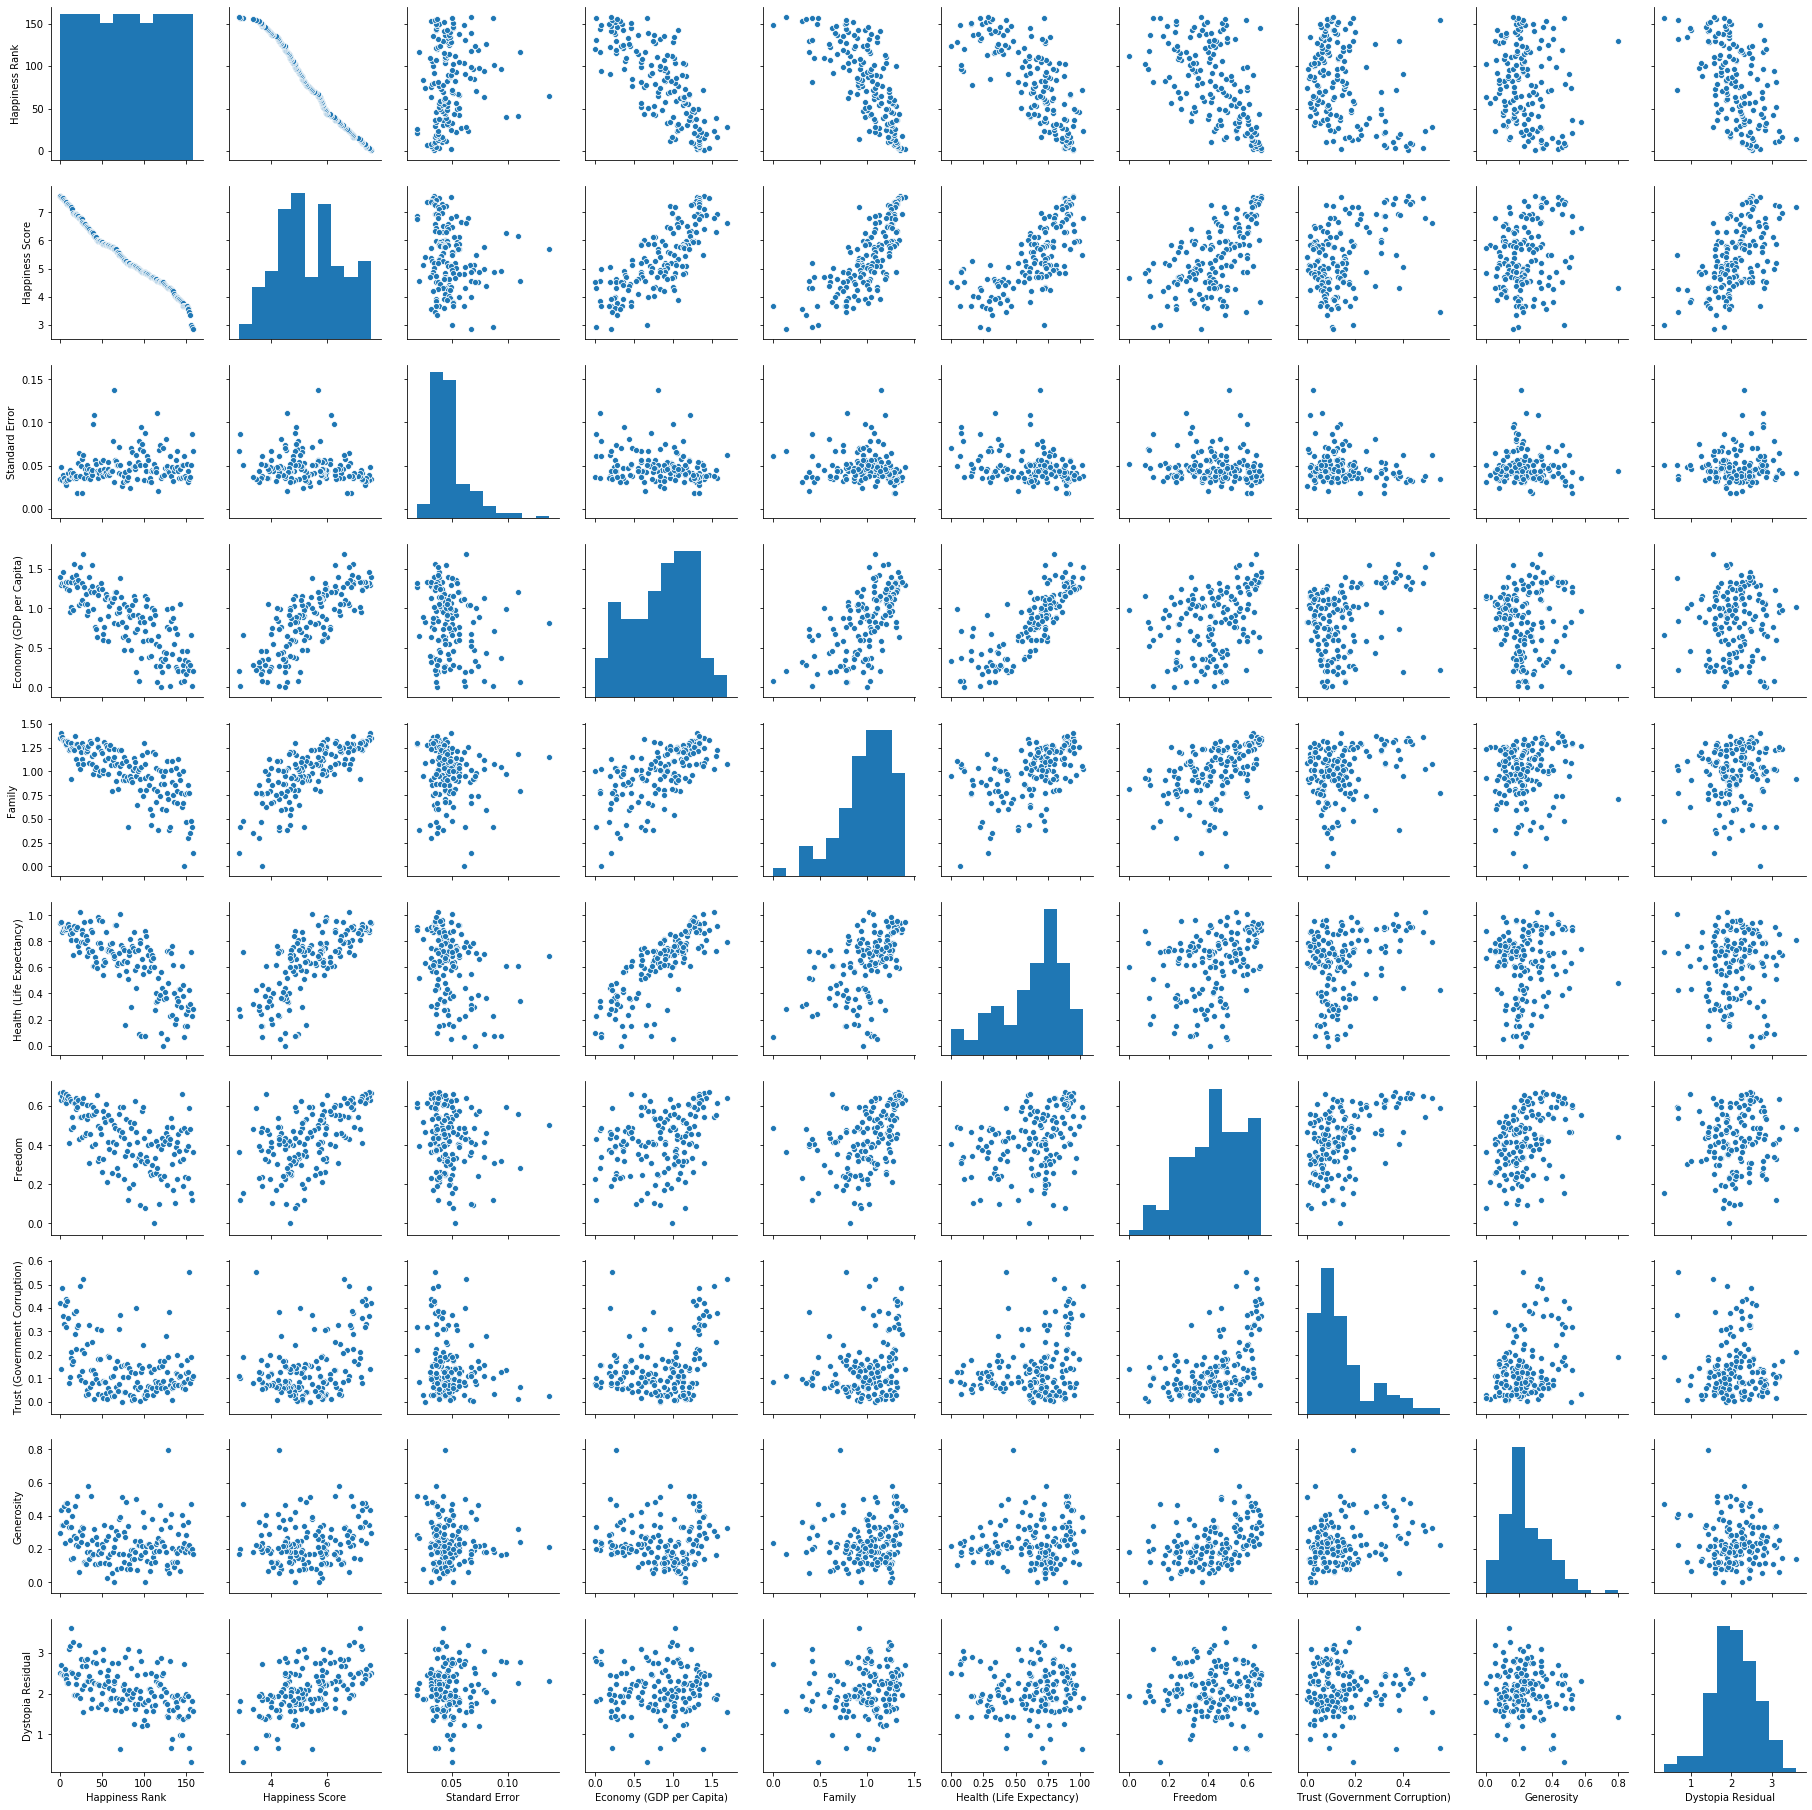

In [21]:
sns.pairplot(data)

Happiness Rank                      AxesSubplot(0.125,0.657941;0.168478x0.222059)
Happiness Score                  AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Standard Error                   AxesSubplot(0.529348,0.657941;0.168478x0.222059)
Economy (GDP per Capita)         AxesSubplot(0.731522,0.657941;0.168478x0.222059)
Family                              AxesSubplot(0.125,0.391471;0.168478x0.222059)
Health (Life Expectancy)         AxesSubplot(0.327174,0.391471;0.168478x0.222059)
Freedom                          AxesSubplot(0.529348,0.391471;0.168478x0.222059)
Trust (Government Corruption)    AxesSubplot(0.731522,0.391471;0.168478x0.222059)
Generosity                             AxesSubplot(0.125,0.125;0.168478x0.222059)
Dystopia Residual                   AxesSubplot(0.327174,0.125;0.168478x0.222059)
dtype: object

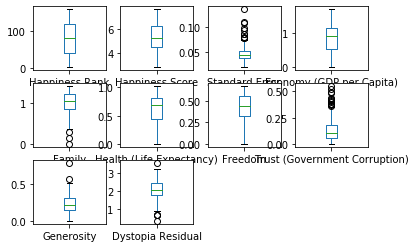

In [22]:
data.plot(kind='box',subplots=True,layout=(3,4))

In [23]:
# outliers are present in Standard error, family, freedom,trust,generosity and Dystopia Residual

In [24]:
# To check Skewness

In [25]:
data.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [26]:
#skewness is present in Standard error, trust and Generosity

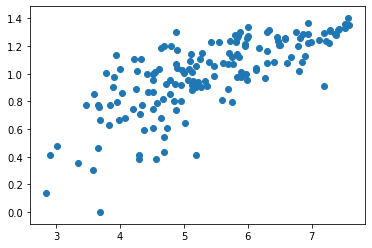

In [27]:
plt.scatter(data['Happiness Score'],data['Family'])
plt.show()

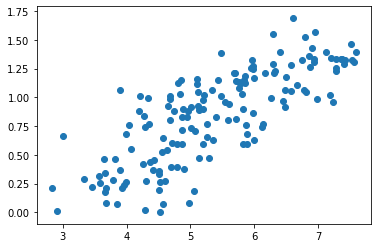

In [28]:
plt.scatter(data['Happiness Score'],data['Economy (GDP per Capita)'])

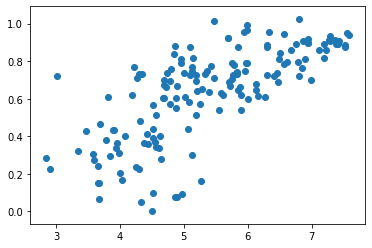

In [29]:
plt.scatter(data['Happiness Score'],data['Health (Life Expectancy)'])

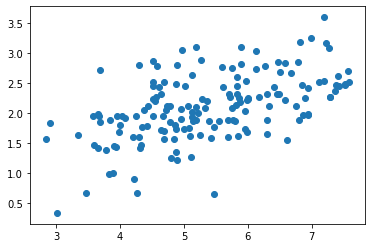

In [30]:
plt.scatter(data['Happiness Score'],data['Dystopia Residual'])

In [39]:
data.drop('Country',axis=1,inplace=True)

In [40]:
# Remove Skewness
for col in data.columns:
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

In [41]:
data.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.890608
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.180922
Generosity                       0.650767
Dystopia Residual               -0.238911
dtype: float64

In [42]:
data.shape

(158, 10)

In [43]:
# removing Outliers
from scipy.stats import zscore
z=np.abs(zscore(data))
threshold=3
print(np.where(z>3))
data=data[(z<3).all(axis=1)]

(array([ 40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([2, 2, 2, 8, 4, 7, 9, 4], dtype=int64))


In [44]:
data.shape

(150, 10)

In [45]:
# 8 outliers are removed

In [46]:
# now splitting data into x and y

In [47]:
x=data.iloc[:,2:]
x.head()

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.033541,1.39651,1.34951,0.94143,0.66557,0.350502,0.259884,2.51738
1,0.047685,1.30232,1.40223,0.94784,0.62877,0.132299,0.362070,2.70201
2,0.032738,1.32548,1.36058,0.87464,0.64938,0.394451,0.293706,2.49204
3,0.038066,1.45900,1.33095,0.88521,0.66973,0.311176,0.297872,2.46531
4,0.034913,1.32629,1.32261,0.90563,0.63297,0.284856,0.377141,2.45176


In [48]:
# scalling the data
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [49]:
x

array([[-0.87885739,  1.35170011,  1.36021085, ...,  2.29108114,
         0.58711486,  0.76366883],
       [ 0.18553243,  1.11094636,  1.57086303, ...,  0.03658475,
         1.664233  ,  1.11591405],
       [-0.93928359,  1.17014433,  1.40444301, ...,  2.74517207,
         0.94362541,  0.71532407],
       ...,
       [-1.11720354, -1.4003665 , -2.82190634, ..., -0.37202006,
         1.12831302, -0.31479717],
       [-0.70077336, -1.48515047, -2.61808677, ..., -0.5342214 ,
        -0.38441416, -0.92305596],
       [ 2.84584938, -2.17873291, -2.37031472, ..., -0.33977048,
        -0.25446188, -0.54198322]])

In [50]:
x.shape

(150, 8)

In [51]:
y=data.iloc[:,1:2]

In [52]:
y

,Happiness Score
0,7.587
1,7.561
2,7.527
3,7.522
4,7.427
...,...
150,3.655
151,3.587
152,3.575
154,3.340


In [53]:
y.shape

(150, 1)

In [54]:
# since target data is in continuous form so i can apply LinearRegression

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [56]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to",r_state,'is',r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print('max r2 score corresponding', final_r_state,'is',max_r_score)
    return final_r_state

In [57]:
# lets check Linear Regression and check max r2 score corresponding to different r_state
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)


r2 score corresponding to 42 is 0.9999528409659849
r2 score corresponding to 43 is 0.9999071270004717
r2 score corresponding to 44 is 0.9999521362310742
r2 score corresponding to 45 is 0.9999559974299985
r2 score corresponding to 46 is 0.9999143827071986
r2 score corresponding to 47 is 0.9999070185875227
r2 score corresponding to 48 is 0.9998729109740047
r2 score corresponding to 49 is 0.9998981890948185
r2 score corresponding to 50 is 0.9998932637413074
r2 score corresponding to 51 is 0.9999421863257129
r2 score corresponding to 52 is 0.9999186958836513
r2 score corresponding to 53 is 0.9999069808321706
r2 score corresponding to 54 is 0.9999277632185567
r2 score corresponding to 55 is 0.999943996728915
r2 score corresponding to 56 is 0.9999371097093757
r2 score corresponding to 57 is 0.9999443175281959
r2 score corresponding to 58 is 0.9999154867560444
r2 score corresponding to 59 is 0.9999197850918754
r2 score corresponding to 60 is 0.9998596314961588
r2 score corresponding to 61 is 

In [59]:
# lets use GridSearchCV to find optimal value of n_neighbors for knn model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 9}

In [62]:
#lets check the mean r2 score of both Linear Regression and KNN Regression
from sklearn.model_selection import cross_val_score
print("Mean r2 Score for Linear Regression:",cross_val_score(lreg,x,y,cv=5,scoring='r2').mean())
print("Standard Deviation in r2 score for Linear Regression:",cross_val_score(lreg,x,y,cv=5,scoring='r2').std())
print()
print("Mean r2 Score for KNN Regression:",cross_val_score(knr,x,y,cv=5,scoring='r2').mean())
print("Standard Deviation in r2 score for KNN Regression:",cross_val_score(knr,x,y,cv=5,scoring='r2').std())
print()

Mean r2 Score for Linear Regression: 0.998089579151755
Standard Deviation in r2 score for Linear Regression: 0.0008201739274316762

Mean r2 Score for KNN Regression: -4.877043619189102
Standard Deviation in r2 score for KNN Regression: 2.5211292103103413



In [63]:
# based on above output Linear Regression is performing well.

In [65]:
# lets check Lasso Regression and Find best value of alpha
from sklearn.linear_model import Lasso,Ridge
lsreg=Lasso()
parameters={"alpha":[0.0001,0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.0001}

In [67]:
# Lets check max r2 score when we use Lasso
lsreg=Lasso(alpha=0.0001)
r_state=maxr2_score(lsreg,x,y)

r2 score corresponding to 42 is 0.9999536199438586
r2 score corresponding to 43 is 0.9999067125705208
r2 score corresponding to 44 is 0.9999518082762361
r2 score corresponding to 45 is 0.9999566016479566
r2 score corresponding to 46 is 0.9999148019627985
r2 score corresponding to 47 is 0.9999078971745684
r2 score corresponding to 48 is 0.999870641271564
r2 score corresponding to 49 is 0.9998982092097407
r2 score corresponding to 50 is 0.99989342893856
r2 score corresponding to 51 is 0.9999432945896396
r2 score corresponding to 52 is 0.9999190096265028
r2 score corresponding to 53 is 0.9999063344408942
r2 score corresponding to 54 is 0.9999271971872151
r2 score corresponding to 55 is 0.9999433439142417
r2 score corresponding to 56 is 0.99993699596667
r2 score corresponding to 57 is 0.9999448912695496
r2 score corresponding to 58 is 0.9999160691275476
r2 score corresponding to 59 is 0.9999188391204289
r2 score corresponding to 60 is 0.9998588429401604
r2 score corresponding to 61 is 0.99

In [68]:
# Lets use cross val score with Lasso
print('Mean r2 score for Lasso Regression:',cross_val_score(lsreg,x,y,cv=10,scoring='r2').mean())
print("Standard deviation for Lasso Regression:",cross_val_score(lsreg,x,y,cv=10,scoring='r2').std())


Mean r2 score for Lasso Regression: 0.9902582295847202
Standard deviation for Lasso Regression: 0.007106650495925728


In [69]:
# lets check Ridge Regression and fine best alpha value
from sklearn.linear_model import Lasso,Ridge
rdreg=Ridge()
parameters={"alpha":[0.0001,0.001,0.01,0.1,1]}
clf=GridSearchCV(rdreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.01}

In [70]:
# Lets check max r2 score when we use Ridge
rdreg=Ridge(alpha=0.01)
r_state=maxr2_score(rdreg,x,y)

r2 score corresponding to 42 is 0.9999530278880303
r2 score corresponding to 43 is 0.9999075196261514
r2 score corresponding to 44 is 0.9999518902754158
r2 score corresponding to 45 is 0.999956311942955
r2 score corresponding to 46 is 0.9999143004496833
r2 score corresponding to 47 is 0.999907241831948
r2 score corresponding to 48 is 0.999872710744365
r2 score corresponding to 49 is 0.9998983021256738
r2 score corresponding to 50 is 0.9998936060348188
r2 score corresponding to 51 is 0.9999425098939094
r2 score corresponding to 52 is 0.9999186314508876
r2 score corresponding to 53 is 0.9999070003365563
r2 score corresponding to 54 is 0.999927657929418
r2 score corresponding to 55 is 0.9999438772567909
r2 score corresponding to 56 is 0.9999368295505635
r2 score corresponding to 57 is 0.9999441412692281
r2 score corresponding to 58 is 0.9999155327049333
r2 score corresponding to 59 is 0.9999200220445537
r2 score corresponding to 60 is 0.9998593619969341
r2 score corresponding to 61 is 0.9

In [71]:
# Lets use cross val score with Ridge
print('Mean r2 score for Ridge Regression:',cross_val_score(rdreg,x,y,cv=10,scoring='r2').mean())
print("Standard deviation for Ridge Regression:",cross_val_score(rdreg,x,y,cv=10,scoring='r2').std())


Mean r2 score for Ridge Regression: 0.9902586712903295
Standard deviation for Ridge Regression: 0.007133677256688446


In [72]:
# as we see both Lasso and Ridge Regression are working nearly same.

In [74]:
# now try to use boosting techniques
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.0001,0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [75]:
# Now use cross_val_score to check mean r2 score and standard deviation
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=500)
print('Mean r2 score for Gradient Boosting Regression:',cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print("Standard deviation for Gradient Boosting Regression:",cross_val_score(gbr,x,y,cv=5,scoring='r2').std())


Mean r2 score for Gradient Boosting Regression: -3.088455673208511
Standard deviation for Gradient Boosting Regression: 2.2192450795583887


In [82]:
# I tried different models and find that Linear Regression is the best
#  max r2 score corresponding  r_state 86 is 0.9999693093824487
from sklearn.metrics import r2_score,mean_squared_error
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=86,test_size=0.20)
lreg=LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)
print('RMSE is:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2 score is:",r2_score(y_test,y_pred))

RMSE is: 0.006321472632832315
r2 score is: 0.9999693093824487


In [83]:
# Saving the Model
from sklearn.model_selection import cross_val_predict
from sklearn.externals import joblib
joblib.dump(lreg,'World_Happiness_Score.obj')
lreg_from_joblib=joblib.load('World_Happiness_Score.obj')
score=cross_val_predict(lreg_from_joblib,x,y,cv=5)
score


array([[7.57613754],
       [7.56184125],
       [7.50124156],
       [7.51780673],
       [7.41592724],
       [7.39602317],
       [7.36666112],
       [7.34586412],
       [7.25708465],
       [7.27216184],
       [7.28662026],
       [7.23378374],
       [7.21127953],
       [7.19097817],
       [7.12656278],
       [6.98765798],
       [6.944669  ],
       [6.93446147],
       [6.94930635],
       [6.89666375],
       [6.84985119],
       [6.85387047],
       [6.80067827],
       [6.77446461],
       [6.79466713],
       [6.76442415],
       [6.67872834],
       [6.57833305],
       [6.58097114],
       [6.57392788],
       [6.49498187],
       [6.49766962],
       [6.4737278 ],
       [6.41956582],
       [6.41871094],
       [6.33533349],
       [6.29394174],
       [6.30945048],
       [6.3090566 ],
       [6.27130371],
       [6.12666071],
       [6.1257382 ],
       [6.00717499],
       [5.99586164],
       [5.99635187],
       [5.99350824],
       [5.97855914],
       [5.971